In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

import math
import scipy.stats as stats
from math import pi
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import sys
import warnings
warnings.filterwarnings('ignore')

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# 파이썬 시각화 패키지 불러오기
import matplotlib.pyplot as plt
%matplotlib inline
# 사용자 운영체제 확인
import platform
platform.system()
# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정
# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [6]:
season_hit = pd.read_csv('hit_season.csv', index_col=False).drop('idx', axis=1)
season_hit

,code,year,avg,slg,bbk,wpa,re24,obp
0,50066,2023,0.226,0.343,0.214,0.000,0.000,0.259
1,50165,2020,0.278,0.597,0.401,-0.000,0.225,0.370
2,50165,2021,0.243,0.422,0.419,-0.015,-0.160,0.317
3,50202,2022,0.297,0.343,0.650,0.000,-0.105,0.367
4,50202,2023,0.281,0.363,0.600,-0.003,0.050,0.333
...,...,...,...,...,...,...,...,...
845,79608,2023,0.279,0.354,0.930,0.014,-0.000,0.355
846,79705,2018,0.253,0.432,0.407,0.000,0.000,0.339
847,79705,2019,0.231,0.356,0.458,-0.006,-0.145,0.299
848,99606,2018,0.293,0.418,0.327,0.000,-0.260,0.367


### 선수별 시즌 기록 꺾은 선 그래프

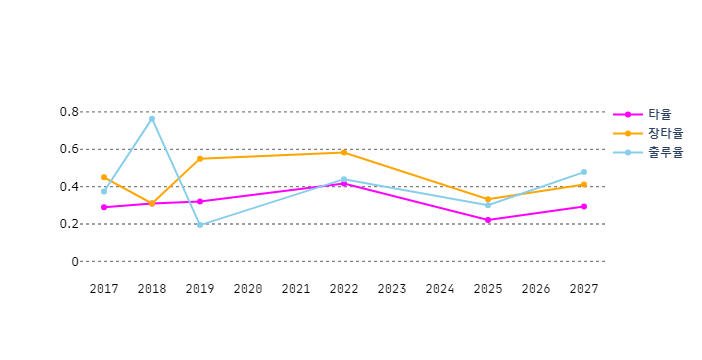

In [163]:
def convert_to_float(lst):
    return [float(x) for x in lst]

def move_item(lst):
    item = lst.pop(5)  # 5번째 항목 추출
    lst.insert(3, item)  # 4번째 자리에 삽입
    
    rest = lst[5:]  # 5번째 항목 이후의 항목 추출
    del lst[5:]  # 추출한 항목들 삭제
    lst.extend(rest)  # 추출한 항목들을 뒤로 이동
    
    return lst

def move_item2(lst):
    item = lst.pop(2)  # 5번째 항목 추출
    lst.insert(1, item)  # 4번째 자리에 삽입

    return lst

def sort_lists(list1, list2):
    sorted_indices = sorted(range(len(list1)), key=lambda x: list1[x])
    sorted_list1 = [list1[i] for i in sorted_indices]
    sorted_list2 = [list2[i] for i in sorted_indices]
    
    return sorted_list1, sorted_list2


def visualize(L):
    colors = ['magenta', 'orange', 'skyblue']
    pithit = L[1]
    lenL = int((len(L)-2) / 7)
    inputs = []
    for split in range(lenL):
        smallL = L[2+(split*7):9+(split*7)]
        inputs.append(smallL)

    seasons = []
    sc = []


    for input in inputs:
        sc.append(move_item(convert_to_float(input[:6])))
        seasons.append(input[-1])

    seasons = convert_to_float(seasons)
    
    seasons, sc = sort_lists(seasons, sc)

    

    if not pithit == 'hit': 
        colnames = ['평균자책점', '출루허용률', '삼진/투구수']
        for i, s in enumerate(sc):
            del s[2]
            del s[3]
            del s[3]
            for s in sc:
                s = move_item2(s)

    else:
        colnames = ['타율', '장타율', '출루율' ]
        for i, s in enumerate(sc):
            del s[2]
            del s[3]
            del s[3]
            
            
    fig = go.Figure()

    colnames = [f"<b>{title}</b>" for title in colnames]

    big = 0
    for i in sc:
        for j in i:
            if j > big:
                big = j

    for i in range(len(colnames)):
        col = colnames[i]
        indicator_values = [s[i] for s in sc]
        fig.add_trace(go.Scatter(x=seasons, y=indicator_values, line_color = colors[i], mode='lines+markers', name=col, opacity=3/(len(colnames))))
        
    fig.update_xaxes(showgrid=False, gridwidth=1, gridcolor='grey')
    fig.update_yaxes(showgrid=True, gridwidth=1.3, gridcolor='grey', griddash='dot',zeroline = True)

    fig.update_layout(xaxis=dict(
                                range=[min(seasons)-0.5, max(seasons)+0.5],
                                    tickmode='linear',
                                    dtick=1,
                                    color='black',
                                tickfont=dict(
                                    family="bold"  # 볼드 처리
                                )
                                ),
                      
                    barmode='group',
           
                        yaxis=dict(
                            range=[-0.1, big+0.1],
                            color='black'
                        ),
                      
                    plot_bgcolor='rgba(0, 0, 0, 0)',
                    paper_bgcolor='rgba(0, 0, 0, 0)',
                      
                    height=100 * len(colnames),
                    showlegend=True,
                      
                     legend=dict(
                    x=1,  # Adjust the x position of the custom legend
                    y=1,  # Adjust the y position of the custom legend
                    font=dict(size=12),  # Adjust the font size of the custom legend
                    xanchor='left',
                    yanchor='top',
                    )
                     )
    fig.add_shape(
                type="line",
                x0=min(seasons)-0.5,
                y0=0,
                x1=max(seasons)+0.5,
                y1=0,
                line=dict(color="grey", width=1.3, dash='dot')
                )
  
    
    # return pio.to_json(fig)
    fig.show()


    #L = ['hex_visualize.py', 'pit', '3.48','0.044','2.203','0.033','0.860','1.332', '양현종']# , '2.79','0.068','4.432','0.080','1.055','1.097', '김광현' , '5.48','0.054','2.897','0.031','0.500','1.552', '류현진']
#L = ['hex_visualize.py', 'hit', '0.290', '0.450', '0.680', '-0.01', '-0.001', '0.374', '2018', '0.320', '0.550', '0.380', '-0.02', '+0.004', '0.194', '2019' , '0.310', '0.310', '0.340', '0.03', '+0.001', '0.764', '2020']
L = ['hex_visualize.py', 'hit', 
     '0.290', '0.450', '0.680', '-0.01', '-0.001', '0.374', '2017',
    '0.320', '0.550', '0.380', '-0.02', '+0.004', '0.194', '2019' , 
     '0.310', '0.310', '0.340', '0.03', '+0.001', '0.764', '2018',
        '0.417', '0.583', '0.2', '0.145', '1.19', '0.44', '2022',
        # '0.304', '0.565', '0.0', '0.025', '0.1', '0.333','2023',
        '0.222', '0.333', '1.0', '-0.001', '-0.12', '0.3','2025',
        '0.294', '0.412', '1.2', '0.01', '0.04', '0.478','2027']

visualize(L)

[[0.29, 0.45, 0.374], [0.32, 0.55, 0.194], [0.31, 0.31, 0.764]]


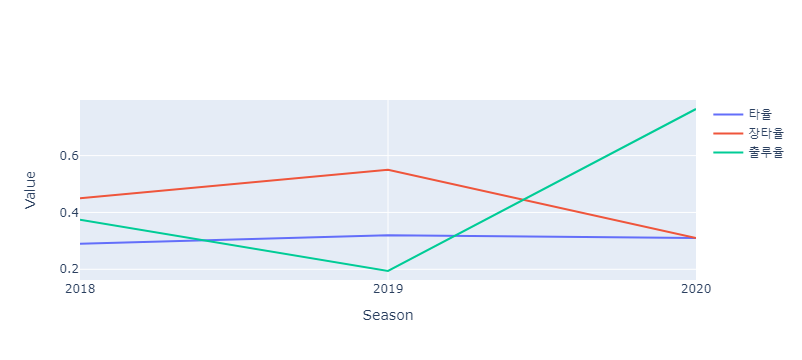

In [48]:
L = ['hex_visualize.py', 'hit', '0.290', '0.450', '0.680', '-0.01', '-0.001', '0.374', '2018', '0.320', '0.550', '0.380', '-0.02', '+0.004', '0.194', '2019' , '0.310', '0.310', '0.340', '0.03', '+0.001', '0.764', '2020']
season_hit_bar(L)